In [1]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.15.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

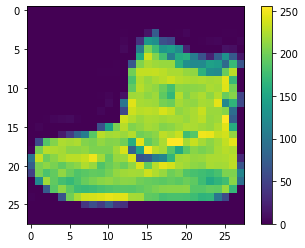

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

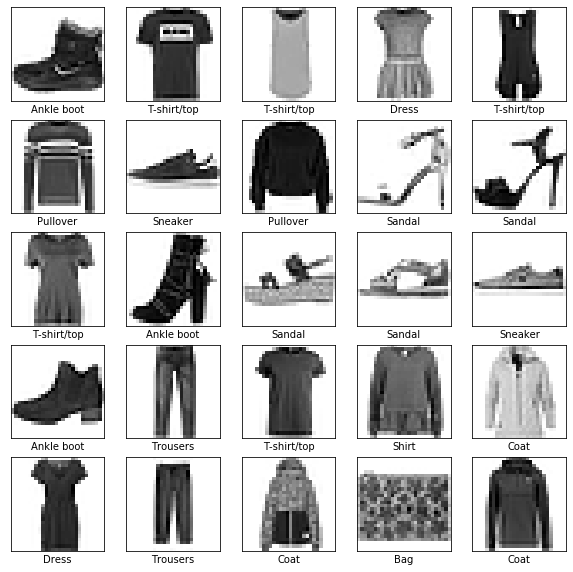

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs = 24)

Train on 60000 samples
Epoch 1/24
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1889 - acc: 0.9289
Epoch 2/24
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1827 - acc: 0.9327
Epoch 3/24
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1799 - acc: 0.9327
Epoch 4/24
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1729 - acc: 0.9347
Epoch 5/24
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1706 - acc: 0.9362
Epoch 6/24
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1658 - acc: 0.9382
Epoch 7/24
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1634 - acc: 0.9391
Epoch 8/24
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1591 - acc: 0.9401
Epoch 9/24
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1564 - acc: 0.9406
Epoch 10/24
60000/60000 [==============================] - 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.4598 - acc: 0.8876
Test accuracy: 0.8876


In [0]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([9.0440037e-16, 2.0377092e-11, 2.8016768e-11, 5.1425857e-11,
       7.8889330e-21, 7.5974560e-10, 6.0100466e-18, 2.0466625e-07,
       2.3697910e-20, 9.9999976e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

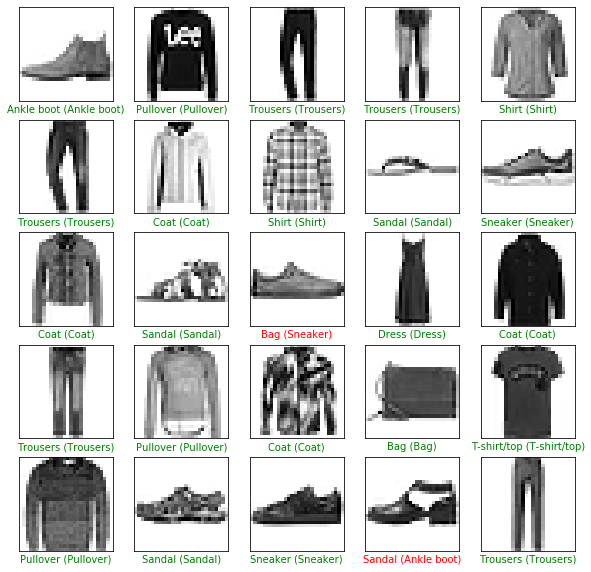

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

In [26]:
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions = model.predict(img)

print(predictions)

[[9.0439698e-16 2.0376976e-11 2.8016714e-11 5.1425659e-11 7.8889031e-21
  7.5974266e-10 6.0100238e-18 2.0466528e-07 2.3697726e-20 9.9999976e-01]]


In [29]:
prediction = predictions[0]

np.argmax(prediction)

9